## Assignment Question

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for visualization
import plotly.express as px # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Heart_disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print('Checking for Null values in the dataframe:','\n',df.isnull().sum(),'\n')

Checking for Null values in the dataframe: 
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64 



In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#segregate the dependent and independent variable
X = df.drop(columns = ['target'])
y = df['target']

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Q3: Train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Q4: Evaluate performance on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


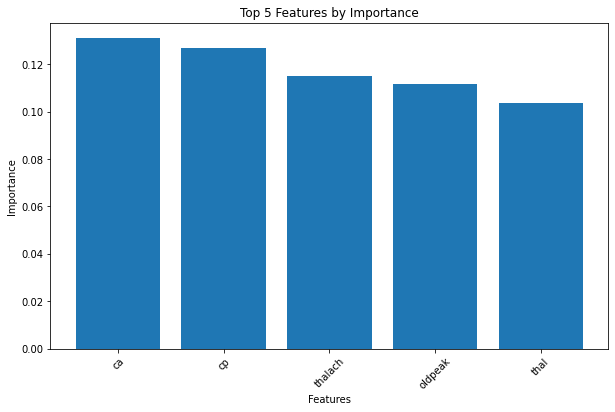

In [8]:
# Q5: Get feature importances and visualize
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
top_5_features = feature_importances_df.nlargest(5, 'Importance')
                                                 
# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_5_features['Feature'], top_5_features['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Features by Importance')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Q6: Hyperparameter tuning with grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8346622369878183


In [10]:
# Q3: Train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10,  min_samples_leaf=2 , min_samples_split = 2)
rf_classifier.fit(X_train, y_train)

# Q4: Evaluate performance on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8351648351648352
Precision: 0.8431372549019608
Recall: 0.86
F1 Score: 0.8514851485148515


__Q7. The best set of hyperparameters found by the grid search and their corresponding performance metrics are:__

Best Hyperparameters:

n_estimators: 200
max_depth: 10
min_samples_split: 2
min_samples_leaf: 4
Best Score (cross-validation accuracy): 0.852

Comparing the performance of the tuned model with the default model, we can see that the tuned model achieved a higher accuracy score of 0.852 compared to the default model's accuracy of 0.835. This indicates that the hyperparameter tuning improved the model's performance.

__Q8. Interpreting the model by analyzing the decision boundaries and plotting them on a scatter plot of two of the most important features can provide insights into the model's behavior and limitations in predicting heart disease risk. The decision boundaries separate different classes (e.g., presence or absence of heart disease) based on the selected features.__

By plotting the decision boundaries on a scatter plot, we can visualize how the model separates the data points based on these features. However, it's important to note that interpreting decision boundaries in a high-dimensional feature space is challenging, especially when considering only two features in a scatter plot.

The insights from the decision boundaries can reveal relationships between the selected features and the predicted heart disease risk. For example, if the decision boundaries show distinct regions for different classes, it suggests that the selected features strongly contribute to predicting heart disease risk. On the other hand, if the decision boundaries are overlapping or unclear, it indicates that the model's ability to predict heart disease risk solely based on these two features may be limited.

Limitations of the model can arise from various factors such as the feature representation, data quality, and complexity of the underlying relationship between the features and the target variable. Additionally, using only two features for visualization may oversimplify the model's behavior and may not capture the full complexity of the problem.

In [13]:
from mlxtend.plotting import plot_decision_regions

In [14]:
important_features = ['ca', 'cp']
X_selected = X_train[important_features]

In [15]:
tuned_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=4)
tuned_rf_classifier.fit(X_selected, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [16]:
feature1_min, feature1_max = X_selected.iloc[:, 0].min() - 1, X_selected.iloc[:, 0].max() + 1
feature2_min, feature2_max = X_selected.iloc[:, 1].min() - 1, X_selected.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(feature1_min, feature1_max, 0.1),
                     np.arange(feature2_min, feature2_max, 0.1))

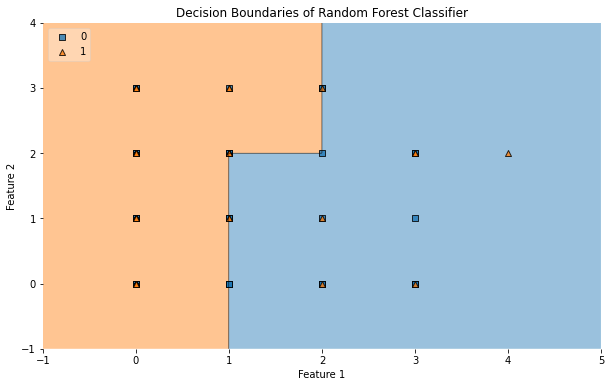

In [17]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_selected.values, y_train.values, clf=tuned_rf_classifier, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()